# Coverage Data Analysis and EDA 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('../data/processed/coverage_data_cleaned.csv')

## Basic Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399859 entries, 0 to 399858
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   group                          399859 non-null  object 
 1   code                           399859 non-null  object 
 2   name                           399859 non-null  object 
 3   year                           399859 non-null  int64  
 4   antigen                        399859 non-null  object 
 5   antigen_description            399859 non-null  object 
 6   coverage_category              399859 non-null  object 
 7   coverage_category_description  399859 non-null  object 
 8   target_number                  399859 non-null  int64  
 9   doses                          399859 non-null  int64  
 10  coverage                       399859 non-null  int64  
 11  drop_off_rate                  399859 non-null  float64
 12  does_coverage_ratio           

In [4]:
df.head()

,group,code,name,year,antigen,antigen_description,coverage_category,coverage_category_description,target_number,doses,coverage,drop_off_rate,does_coverage_ratio
0,COUNTRIES,ABW,Aruba,2023,BCG,BCG,ADMIN,Administrative coverage,0,0,0,0.000000,0.000000
1,COUNTRIES,ABW,Aruba,2023,BCG,BCG,OFFICIAL,Official coverage,0,0,0,0.000000,0.000000
2,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044,945,90,0.094828,0.905172
3,COUNTRIES,ABW,Aruba,2023,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",OFFICIAL,Official coverage,0,0,90,0.000000,0.000000
4,COUNTRIES,ABW,Aruba,2023,DIPHCV5,"Diphtheria-containing vaccine, 5th dose (2nd b...",ADMIN,Administrative coverage,1219,1008,82,0.173093,0.826907


In [5]:
df.isnull().sum()

group                            0
code                             0
name                             0
year                             0
antigen                          0
antigen_description              0
coverage_category                0
coverage_category_description    0
target_number                    0
doses                            0
coverage                         0
drop_off_rate                    0
does_coverage_ratio              0
dtype: int64

## Summary Statistics

In [6]:
df.describe(include='all')

,group,code,name,year,antigen,antigen_description,coverage_category,coverage_category_description,target_number,doses,coverage,drop_off_rate,does_coverage_ratio
count,399859,399859,399859,399859.000000,399859,399859,399859,399859,3.998590e+05,3.998590e+05,399859.000000,399859.000000,399859.000000
unique,9,246,243,NaN,70,70,6,6,NaN,NaN,NaN,NaN,NaN
top,COUNTRIES,ETH,Ethiopia,NaN,DTPCV3,"DTP-containing vaccine, 3rd dose",ADMIN,Administrative coverage,NaN,NaN,NaN,NaN,NaN
freq,381041,2031,2031,NaN,26015,26015,155576,155576,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2009.202464,NaN,NaN,NaN,NaN,5.494901e+07,6.878571e+05,44.903183,0.056880,0.136638
std,NaN,NaN,NaN,12.143572,NaN,NaN,NaN,NaN,2.407482e+10,5.200978e+06,68.656686,3.327247,3.336899
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,-2.222882e+08,0.000000,-644.714286,-1997.216534
25%,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,46.000000,0.000000,0.000000
75%,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,91.000000,0.000000,0.000000


## Distribution of Coverage

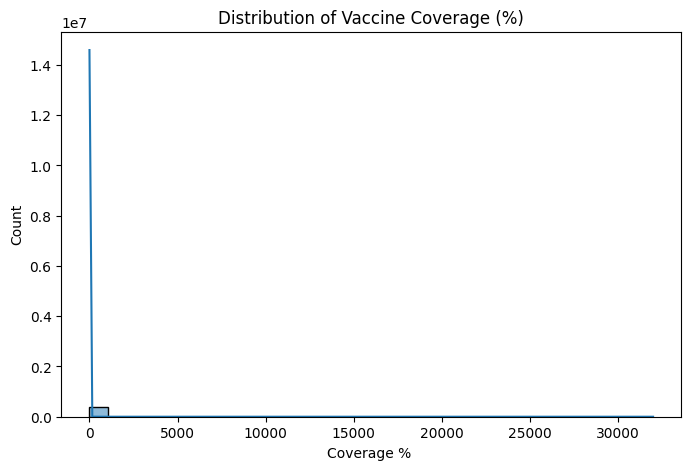

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['coverage'], bins=30, kde=True)
plt.title("Distribution of Vaccine Coverage (%)")
plt.xlabel("Coverage % ")
plt.ylabel("Count")
plt.savefig('../output/Coverage_Data/Distribution of Vaccine Coverage.png')
plt.show()

## Trend over time (global avg coverage per year)

In [8]:
yearly_trend = df.groupby("year")['coverage'].mean().reset_index()

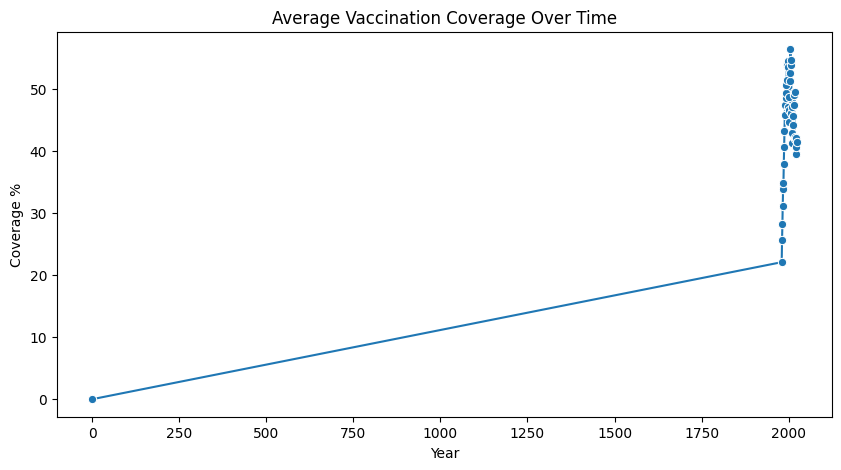

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data = yearly_trend, x = 'year', y = 'coverage', marker  = 'o')
plt.title("Average Vaccination Coverage Over Time")
plt.xlabel("Year")
plt.ylabel("Coverage %")
plt.savefig('../output/Coverage_Data/Average Vaccination Coverage Over Time.png')
plt.show()

## Top 10 countries by average coverage

In [12]:
top_countries = df.groupby("name")['coverage'].mean().sort_values(ascending=False).head(10)

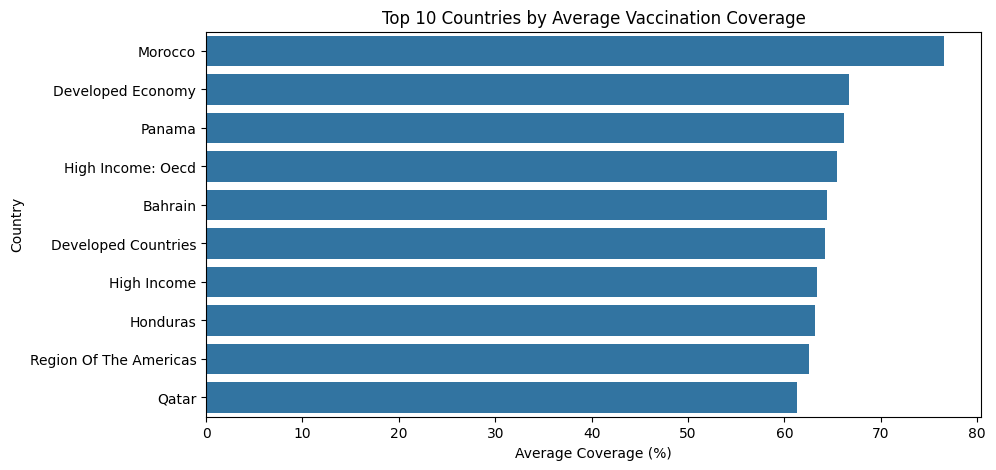

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x = top_countries.values, y = top_countries.index)
plt.title("Top 10 Countries by Average Vaccination Coverage")
plt.xlabel("Average Coverage (%)")
plt.ylabel("Country")
plt.savefig('../output/Coverage_Data/Top 10 Countries by Average Vaccination Coverage.png')
plt.show()

## Drop-off rate between target and doses

In [14]:
df['drop_off_rate'] = df.apply(
    lambda row : (row['target_number'] - row['doses']) / row['target_number']
    if row['target_number'] > 0 else 0, axis = 1
)

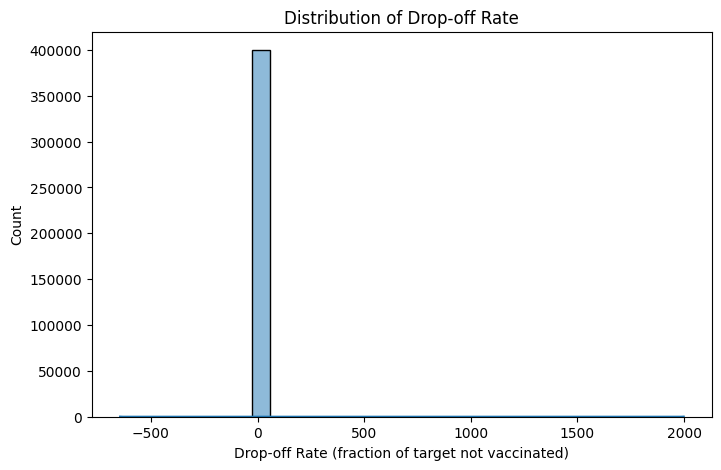

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['drop_off_rate'], bins=30, kde=True)
plt.title("Distribution of Drop-off Rate")
plt.xlabel("Drop-off Rate (fraction of target not vaccinated)")
plt.ylabel("Count")
plt.savefig('../output/Coverage_Data/Distribution of Drop-off Rate.png')
plt.show()

## Correlation analysis

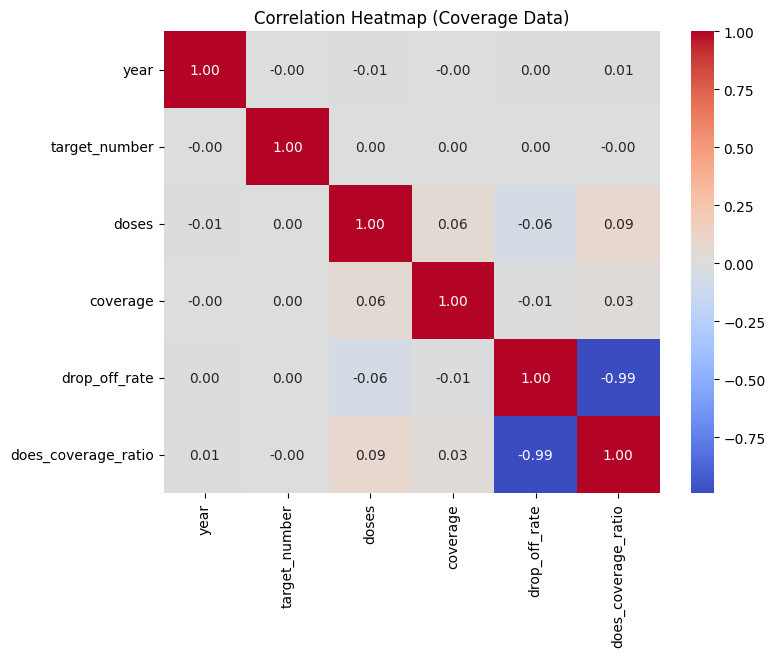

In [17]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Coverage Data)")
plt.savefig('../output/Coverage_Data/Correlation Heatmap (Coverage Data).png')
plt.show()

## Year vs Coverage for selected countries

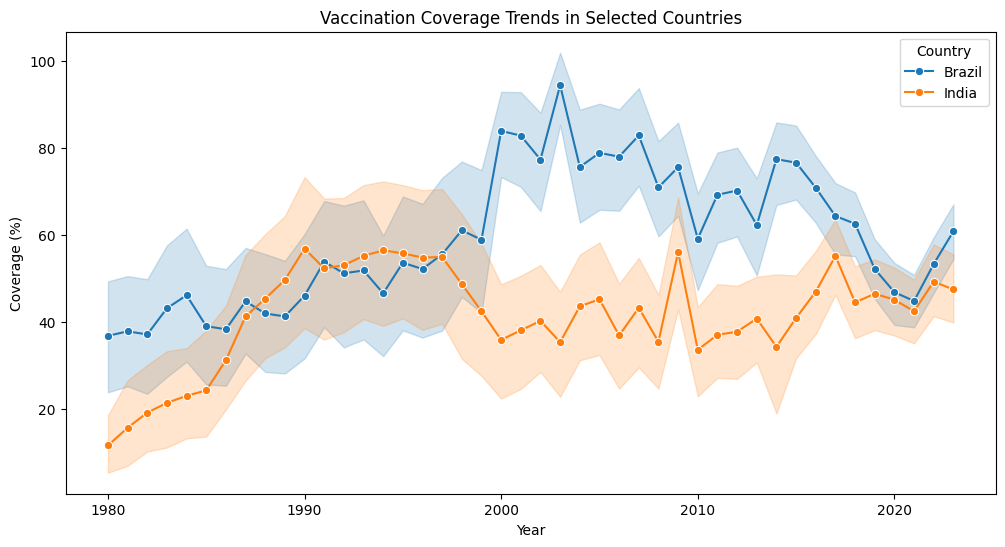

In [20]:
selected_countries = ["India","Brazil"]

plt.figure(figsize=(12,6))
sns.lineplot(data=df[df['name'].isin(selected_countries)],
             x="year", y="coverage", hue="name", marker="o")
plt.title("Vaccination Coverage Trends in Selected Countries")
plt.xlabel("Year")
plt.ylabel("Coverage (%)")
plt.legend(title="Country")
plt.savefig('../output/Coverage_Data/Vaccination Coverage Trends in Selected Countrie.png')
plt.show()